In [1]:
import matplotlib.pyplot as plt
from matplotlib import patches
import numpy as np
import pandas as pd
import pickle
import xml.etree.cElementTree as ET
import os

# Analysing Workload of Cobots / Batches

In [2]:
listee = {'OutD0_0': [16.59], 'OutD0_1': [9.5, 8.25], 
          'OutD0_3': [11.79, 5.37, 0.69], 'OutD0_4': [10.269999999999998, 2.93, 4.25], 
          'OutD0_5': [1.61, 13.52, 1.9], 'OutD0_7': [2.51, 8.88, 3.27], 
          'OutD0_8': [17.230000000000004], 'OutD1_9': [15.120000000000001], 
          'OutD0_10': [16.18], 'OutD0_2': [7.06, 5.01]}

In [3]:
listee = {'OutD0_0': [17.230000000000004], 'OutD0_1': [9.5, 8.25], 'OutD0_2': [1.9, 3.27], 
          'OutD1_3': [11.79, 5.37, 0.69], 'OutD1_4': [10.269999999999998, 2.93, 4.25], 
          'OutD1_5': [16.18, 1.61], 'OutD1_6': [8.88, 7.06], 'OutD1_7': [5.01, 2.51], 
          'OutD1_8': [13.52], 'OutD1_9': [16.59], 'OutD1_10': [15.120000000000001]}

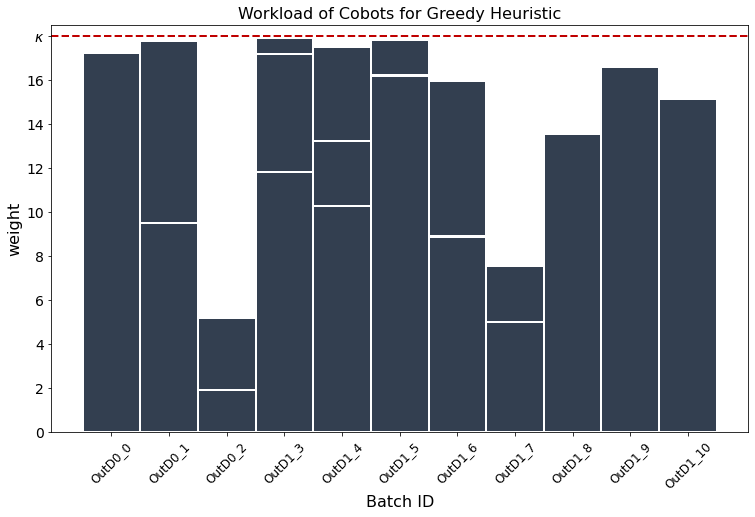

In [4]:
width = 2
toggle_h = .3
toggle_v = .01
fig, ax = plt.subplots()
for count, value in enumerate(listee.values()):
    curr_height = 0
    for height in value:
        rect = patches.Rectangle((count*width, curr_height), 
                                 width=width, height=height,
                                 facecolor = '#333F50', edgecolor = 'w', lw=2)
        curr_height += height+toggle_v        
        ax.add_patch(rect)
ax.autoscale_view()
ax.figure.canvas.draw()

box_widths = np.arange(0, len(listee.keys())*width+1, width)
xticks = []
for first, second in zip(box_widths, box_widths[1:]):
    xticks.append((first + second) / 2)
ax.set_xticks(xticks)
ax.set_xticklabels(listee.keys())
ax.axhline(y=18, c="#C00000", lw=2, linestyle="--")
ax.set_yticks(np.arange(0, 19, 2))
ax.set_yticklabels(list(np.arange(0, 17, 2))+["$\kappa$"])
ax.tick_params(axis="y", which='major', labelsize=14)
ax.tick_params(axis='x', which='major', labelsize=12, rotation=45)
ax.set_ylabel("weight", fontsize=16)
ax.set_xlabel("Batch ID", fontsize=16)
ax.set_ylim((0,18.5))
plt.title("Workload of Cobots for Greedy Heuristic", fontsize=16)
fig.set_size_inches(12.5, 7.5)
#ax.set_aspect('equal')
plt.savefig('../../../figures/sol.eps',bbox_inches='tight', transparent="False", format="eps")
plt.show()

# Runtime Analysis

In [5]:
# sku 24, orders_10_mean_1x6_sku, dedicated
runtime_dict_24_10 = {0: 85.1, 5: 66.2, 10: 64.39999999999999, 
                      20: 64.39999999999999, 30: 64.4, 50: 64.4, 70: 64.39999999999999}
runtime_dict_24_10 = {k: (v -  minimum) / v for minimum in (min(runtime_dict_24_10.values()),) for k, v in runtime_dict_24_10.items()}

In [6]:
runtime_dict_360_10 = {0: 819.5999999999997, 5: 750.8999999999996, 10: 755.1999999999998, 
                       20: 738.5999999999997, 30: 763.1999999999998, 50: 748.7999999999997, 70: 741.8999999999997}
runtime_dict_360_10 = {k: (v - minimum) / v for minimum in (min(runtime_dict_360_10.values()),) for k, v in runtime_dict_360_10.items()}

In [7]:
runtime_dict_24_20 = {0: 1531.4, 5: 1378.3, 10: 1378.3, 20: 1289.8, 40: 1289.8, 
                      80: 1289.8, 300: 1285.1}
runtime_dict_24_20 = {k: (v - minimum) / v for minimum in (min(runtime_dict_24_20.values()),) for k, v in runtime_dict_24_20.items()}

In [8]:
df_24_10 = pd.DataFrame.from_dict(runtime_dict_24_10, orient="index").reset_index()
df_24_10.columns = ["Runtime", "Fitness (24, 10)"]
df_360_10 = pd.DataFrame.from_dict(runtime_dict_360_10, orient="index").reset_index()
df_360_10.columns = ["Runtime", "Fitness (360, 10)"]

In [9]:
df = df_24_10.merge(df_360_10)

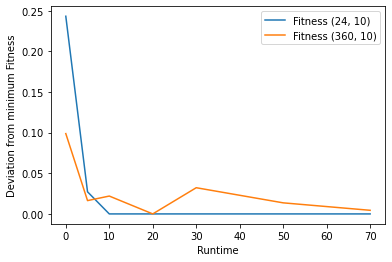

In [10]:
df.plot(x="Runtime")
plt.ylabel("Deviation from minimum Fitness")
plt.show()

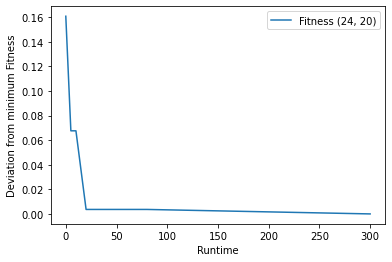

In [11]:
df_24_10 = pd.DataFrame.from_dict(runtime_dict_24_20, orient="index").reset_index()
df_24_10.columns = ["Runtime", "Fitness (24, 20)"]
df_24_10.plot(x="Runtime")
plt.ylabel("Deviation from minimum Fitness")
plt.show()

In [12]:
a = {'OutD1_1': ['7', '2', '9', '10'], 'OutD0_3': ['7', '2', '10', '11', '16'], 
     'OutD0_6': ['15', '16', '11', '10', '9', '2', '7'], 'OutD1_10': ['15', '1', '2', '9', '10', '4', '11'], 
     'OutD0_7': ['1', '2', '10', '4', '11', '16', '15'], 'OutD0_2': ['7', '1', '2', '9', '4', '11', '16', '15'], 
     'OutD1_4': ['1', '9', '10', '11'], 'OutD0_8': ['4', '10', '2', '7'], 
     'OutD0_5': ['1', '7', '2', '9', '11', '16', '15'], 'OutD0_9': ['1', '9', '10', '4', '11', '15']}

In [13]:
with open('solutions/mixed360.pickle', 'rb') as handle:
    b = pickle.load(handle)

FileNotFoundError: [Errno 2] No such file or directory: 'solutions/mixed360.pickle'

In [14]:
for orders in [10,20]:
    for subscript in ["", "_b"]:
        x = []
        y = []
        for key, value in b[("360", subscript, orders)].items():
            if key not in []:
                x.append(key)
                y.append(value[0])
        y = np.array(y) / np.min(y)
        plt.plot(x,y, alpha=0.6, label='orders_{}_mean_5_sku_{}{}'.format(str(orders), "360", subscript))
plt.legend()
plt.show()

NameError: name 'b' is not defined

In [15]:
b[("360", "", 20)][40][0]

NameError: name 'b' is not defined

In [16]:
with open('solutions/mixed360_not_random_twoopt.pickle', 'rb') as handle:
    c = pickle.load(handle)

FileNotFoundError: [Errno 2] No such file or directory: 'solutions/mixed360_not_random_twoopt.pickle'

In [17]:
c[("360", "", 20)][40][0]

NameError: name 'c' is not defined

In [18]:
df = pd.DataFrame({"Randomized 2-opt":[True, True, False, False], 
             "Randomized LS": [True, False, False, True],
             "Fitness":[742.1, 703.8, 738.1, 745.7],
             "Runtime":[40, 40, 40, 40]})

In [19]:
print(df.to_latex(index=True, bold_rows=True))

\begin{tabular}{lllrr}
\toprule
{} &  Randomized 2-opt &  Randomized LS &  Fitness &  Runtime \\
\midrule
\textbf{0} &              True &           True &    742.1 &       40 \\
\textbf{1} &              True &          False &    703.8 &       40 \\
\textbf{2} &             False &          False &    738.1 &       40 \\
\textbf{3} &             False &           True &    745.7 &       40 \\
\bottomrule
\end{tabular}



In [20]:
df = pd.DataFrame({"Randomized 2-opt":[True, True, False, False], 
             "Randomized LS": [True, False, False, True],
             "Fitness":[1525.8, 1533.2, 1483.3, 1492.2],
             "Runtime":[40, 40, 40, 40]})

In [21]:
print(df.to_latex(index=True, bold_rows=True))

\begin{tabular}{lllrr}
\toprule
{} &  Randomized 2-opt &  Randomized LS &  Fitness &  Runtime \\
\midrule
\textbf{0} &              True &           True &   1525.8 &       40 \\
\textbf{1} &              True &          False &   1533.2 &       40 \\
\textbf{2} &             False &          False &   1483.3 &       40 \\
\textbf{3} &             False &           True &   1492.2 &       40 \\
\bottomrule
\end{tabular}



### Get Latex Code from Cobot Tours

#### Read Solution to dedicated problem from Pickle

In [22]:
with open('solutions/dedicated3.pickle', 'rb') as handle:
    b = pickle.load(handle)

FileNotFoundError: [Errno 2] No such file or directory: 'solutions/dedicated3.pickle'

In [23]:
def latex_string_from_route(route):
    latex_string = ""
    count = 1
    for key, value in route.items():
        latex_string +=  "{} & ".format(str(count))
        for i, node in enumerate(value):
            if i == len(value)-1:
                latex_string += node
            else:
                latex_string += node +  f" $\\rightarrow$ "
        latex_string += " \\\\" + "\n \n"
        count+=1
    return latex_string 

In [24]:
for key, value in b.items():
    min_runtime = min(value, key=value.get)
    fitness, value = value[min_runtime]

    route = value
    #fitness, route = solution
    sku, subscript, num_orders = key
    print('orders_{}_mean_5_sku_{}{}'.format(str(num_orders), sku, subscript) + 
          "\n--------------------------------------------------------------- \n\n"+
          "{} after {} seconds".format(str(fitness), str(min_runtime)) + "\n\n"+
          latex_string_from_route(route))

NameError: name 'b' is not defined

#### Read Solution to mixed problem from Pickle

In [25]:
with open('solutions/mixed16.pickle', 'rb') as handle:
    mixed = pickle.load(handle)

FileNotFoundError: [Errno 2] No such file or directory: 'solutions/mixed16.pickle'

In [26]:
def latex_string_from_mixed_route(route):
    latex_string = ""
    count = 1
    for key, value in route.items():
        latex_string +=  "{} & ".format(str(count)) + key.split("_")[0] + " $\\rightarrow$ "
        for i, node in enumerate(value):
            latex_string += node +  f" $\\rightarrow$ "
        latex_string += key.split("_")[0] +  " \\\\" + "\n \n"
        count+=1
    return latex_string 

In [27]:
for key, value in mixed.items():
    min_runtime = min(value, key=value.get)
    fitness, value = value[min_runtime]

    route = value
    #fitness, route = solution
    sku, subscript, num_orders = key
    print('orders_{}_mean_5_sku_{}{}'.format(str(num_orders), sku, subscript) + 
          "\n--------------------------------------------------------------- \n\n"+
          "{} after {} seconds".format(str(fitness), str(min_runtime)) + "\n\n"+
          latex_string_from_mixed_route(route))

NameError: name 'mixed' is not defined

# Read Solution from XML

In [2]:
def latex_string_from_xml(path):
    tree = ET.parse(path)
    root = tree.getroot()

    collecting = root.get("Collecting")
    fitness = []
    for ps in root.iter("PackStations"):
        latex_string = ""
        for batch in ps.iter("Batch"):
            print(batch)
            #latex_string = ""
            latex_string += "{} & ".format(str(batch.get("BatchNumber")))
            dist = batch.get("Distance")
            fitness.append(float(dist))
            for edges in batch.findall("Edges"):


                for edge in edges.iter("Edge"):
                    if edge.get("EndNode") == "OutD0" or edge.get("EndNode") == "OutD1":
                        latex_string += edge.get("StartNode") + f" $\\rightarrow$ " + edge.get("EndNode") + "\\\\" + "\n \n"
                    else:
                        latex_string += edge.get("StartNode") + f" $\\rightarrow$ " 
        return latex_string, sum(fitness)

In [12]:
SKUS = ["24", "360"]
NUM_ORDERS = ["10", "20"]
SUBSCRIPTS = ["_a", "_b", ""]
POLICIES = ["dedicated", "mixed"]
MEANS = ["5", "1x6"]
fitness = {}
for policy in POLICIES:
    for sku in SKUS:
        for orders in NUM_ORDERS:
            for mean in MEANS:
                for subscript in SUBSCRIPTS:                
                    file = 'new_mixed/orders_{}_mean_{}_sku_{}{}_{}.xml'.format(orders, mean, sku, subscript, policy)
                    path = '../instance_demo/solutions/' + file
                    if not os.path.isfile(path):
                        continue
                    
                    print("--------------------------------------------------------------------------------------------")
                    print(file +" \n")
                    print("--------------------------------------------------------------------------------------------")
                    result = latex_string_from_xml(path)
                    l_string = result[0] 
                    fitness[policy, sku, orders, mean, subscript] = result[1]
                    print(l_string)

--------------------------------------------------------------------------------------------
new_mixed/orders_10_mean_5_sku_24_a_dedicated.xml 

--------------------------------------------------------------------------------------------
<Element 'Batch' at 0x0000013B4DBEB180>
<Element 'Batch' at 0x0000013B4DBF1450>
<Element 'Batch' at 0x0000013B4DBFA770>
<Element 'Batch' at 0x0000013B4DBD7810>
<Element 'Batch' at 0x0000013B4DC08CC0>
<Element 'Batch' at 0x0000013B4DBA1130>
5 & OutD0 $\rightarrow$ 2 $\rightarrow$ 10 $\rightarrow$ 9 $\rightarrow$ 4 $\rightarrow$ 11 $\rightarrow$ 16 $\rightarrow$ 15 $\rightarrow$ OutD0\\
 
0 & OutD0 $\rightarrow$ 15 $\rightarrow$ 16 $\rightarrow$ 11 $\rightarrow$ 9 $\rightarrow$ 7 $\rightarrow$ OutD0\\
 
1 & OutD0 $\rightarrow$ 9 $\rightarrow$ 4 $\rightarrow$ 10 $\rightarrow$ 2 $\rightarrow$ OutD0\\
 
4 & OutD1 $\rightarrow$ 11 $\rightarrow$ 4 $\rightarrow$ 10 $\rightarrow$ 7 $\rightarrow$ 15 $\rightarrow$ 16 $\rightarrow$ OutD1\\
 
2 & OutD1 $\rightarrow

In [14]:
fitness

{('dedicated', '24', '10', '5', '_a'): 233.39999999999998,
 ('dedicated', '24', '10', '5', '_b'): 190.70000000000002,
 ('dedicated', '24', '10', '5', ''): 245.4,
 ('dedicated', '24', '10', '1x6', '_a'): 64.4,
 ('dedicated', '24', '10', '1x6', '_b'): 48.8,
 ('dedicated', '24', '10', '1x6', ''): 64.4,
 ('dedicated', '24', '20', '5', '_a'): 343.4,
 ('dedicated', '24', '20', '5', '_b'): 333.29999999999995,
 ('dedicated', '24', '20', '5', ''): 317.00000000000006,
 ('dedicated', '24', '20', '1x6', '_a'): 99.89999999999999,
 ('dedicated', '24', '20', '1x6', '_b'): 105.3,
 ('dedicated', '24', '20', '1x6', ''): 87.6,
 ('dedicated', '360', '10', '5', '_a'): 882.8000000000001,
 ('dedicated', '360', '10', '5', '_b'): 863.5999999999999,
 ('dedicated', '360', '10', '5', ''): 779.5,
 ('dedicated', '360', '10', '1x6', '_a'): 208.9,
 ('dedicated', '360', '10', '1x6', '_b'): 228.7,
 ('dedicated', '360', '10', '1x6', ''): 259.1,
 ('dedicated', '360', '20', '5', '_a'): 1442.6999999999998,
 ('dedicated', '

# compare VNS and ILS

In [31]:
with open('solutions/mixed_fitness_ils_vns.pickle', 'rb') as handle:
    mixed = pickle.load(handle)

In [32]:
df = pd.DataFrame.from_dict(mixed, orient="index")

In [33]:
df

,0
"(24, _b, 10, ILS)",122.5


In [34]:
df=pd.concat([df.reset_index()["index"].apply(pd.Series), df.iloc[:,0].reset_index(drop=True)], axis=1)
df.columns = ["sku", "subscript", "orders", "mean", "method", "fitness"]

ValueError: Length mismatch: Expected axis has 5 elements, new values have 6 elements

In [ ]:
df2=df.copy()
df2["fitness"] = [48.6, 
                 133.6,
                 249.6,
                 141.4,
                 215.5,
                 130.1,
                 216.3,
                 373.3,
                 703.8,
                 468.3,
                 658.3, 
                 362.5,
                 696.3]
df2.drop("method", axis=1, inplace=True)

In [ ]:
comp_df = df.merge(df2, left_on=["sku", "subscript", "orders", "mean"],
                  right_on=["sku", "subscript", "orders", "mean"])
comp_df.drop("method", axis=1, inplace=True)

In [ ]:
comp_df.columns=["sku", "subscript", "orders", "mean", "ILS", "VNS"]


In [ ]:
comp_df["gap in %"] = (comp_df.ILS-comp_df.VNS)/comp_df.VNS*100

In [ ]:
agg_df = comp_df.groupby(["sku", "orders", "mean"])["ILS", "VNS"].sum()

In [ ]:
agg_df["gap in %"] = (agg_df.ILS-agg_df.VNS)/agg_df.VNS*100

In [ ]:
print(agg_df.to_latex())

In [ ]:
print(comp_df.to_latex())